# Project - Final notebook


How to choose phone's brand according to Amazon ?

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
import gzip
sns.set()
sns.axes_style("darkgrid")
sns.set_palette("Set2")

# Datasets we use

### http://jmcauley.ucsd.edu/data/amazon/
- Cell Phones and Accessories reviews : Amazon reviews for phones and accessories category
- Cell Phones and Accessories metadata : Metadata of products in phones and accessories category 

### https://www.kaggle.com/arwinneil/gsmarena-phone-dataset/
- GSMArena Phone Dataset : 8000+ phones specifications scraped from GSMArena Website

<a id='#read_the_data'></a>
# Read the data


We decided to save the different datasets to CSV files because of the efficency at the loading. We have another notebook that generates the files (in */scripts* path)


In [2]:
# read the data from previosly created csv files
reviews_df = pd.read_csv('./data/reviews_cellphones.csv')

In [3]:
metadata_df = pd.read_csv('./data/metadata_cellphones.csv')

In [4]:
ratings_cols = ['reviewerID', 'asin', 'overall', 'unixReviewTime']
ratings_df = reviews_df[ratings_cols]

In [5]:
reviews_df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,A1EWN6KZ4HMLT7,011040047X,S. Prescott,"[2, 2]","The case pictured is a soft violet color, but ...",1.0,Wrong color,1344902400,"08 14, 2012"
1,1,A1YX2RBMS1L9L,0110400550,Andrea Busch,"[0, 0]",Saw this same case at a theme park store for 2...,5.0,Great product,1353542400,"11 22, 2012"
2,2,A180NNPPKWCCU0,0110400550,Aniya pennington,"[3, 3]",case fits perfectly and I always gets complime...,5.0,Perfect,1374105600,"07 18, 2013"
3,3,A3HVRXV0LVJN7,0110400550,BiancaNicole,"[4, 4]",Best phone case ever . Everywhere I go I get a...,5.0,A++++,1358035200,"01 13, 2013"
4,4,A292527VPX98P8,0110400550,Cebell,"[0, 1]",It may look cute. This case started off pretty...,1.0,Do NOT GET IT!!,1353888000,"11 26, 2012"


In [6]:
metadata_df.head()

,Unnamed: 0,asin,related,title,price,salesRank,imUrl,brand,categories,description
0,0,0110400550,"{'also_bought': ['B00C56IXFG', 'B008ZUQWOK', '...",Pink &amp; White 3d Melt Ice-cream Skin Hard C...,3.33,{'Cell Phones & Accessories': 83460},http://ecx.images-amazon.com/images/I/31zn6SOL...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Pink & White 3D Melt Ice-Cream Skin Hard Case ...
1,1,011040047X,"{'buy_after_viewing': ['B008RU7UL2', 'B00698LY...",Purple Hard Case Cover for Iphone 4 4s 4g with...,1.94,{'Cell Phones & Accessories': 495795},http://ecx.images-amazon.com/images/I/41WCZc2d...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Purple Hard Case Cover for iPhone 4 4S 4G With...
2,2,0195866479,"{'buy_after_viewing': ['B00530RXP2', 'B004SH9B...",Hello Kitty Light-weighted Chrome Case Black C...,2.94,{'Cell Phones & Accessories': 371302},http://ecx.images-amazon.com/images/I/41fy1%2B...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...","Thin and light weighted,\r\nCase's unique desi..."
3,3,0214514706,"{'buy_after_viewing': ['B0042FV2SI', 'B00869D2...",Cool Summer Breeze in the Ocean Beach Collecti...,0.94,{'Cell Phones & Accessories': 778100},http://ecx.images-amazon.com/images/I/415cmp6Q...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Product Name: Cool Summer Breeze In The Ocean...
4,4,0214714705,"{'buy_after_viewing': ['B008EU7HRM', 'B00869D2...",Cool Summer Breeze In The Ocean Beach Collecti...,5.79,{'Cell Phones & Accessories': 654894},http://ecx.images-amazon.com/images/I/41XDwPt2...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Product Name: Cool Summer Breeze In The Ocean...


In [7]:
ratings_df.head()

,reviewerID,asin,overall,unixReviewTime
0,A1EWN6KZ4HMLT7,011040047X,1.0,1344902400
1,A1YX2RBMS1L9L,0110400550,5.0,1353542400
2,A180NNPPKWCCU0,0110400550,5.0,1374105600
3,A3HVRXV0LVJN7,0110400550,5.0,1358035200
4,A292527VPX98P8,0110400550,1.0,1353888000



# Descriptive statistics
 

## Reviews analysis

First, we take a look at the entire reviews dataset for cellphones and accessories.

In [8]:
unique_reviewers = reviews_df['reviewerID'].unique()
unique_reviewers_percent = len(unique_reviewers) / reviews_df.shape[0] *100
unique_products = reviews_df['asin'].unique()
unique_products_percent = len(unique_products) / reviews_df.shape[0] *100
print ("Shape: ", reviews_df.shape)
print ("Ratings values: ", reviews_df.overall.unique())
print ("Min review unix time: ", reviews_df.unixReviewTime.min())
print ("Max review unix time: ", reviews_df.unixReviewTime.max())
print ("Percentage of unique reviewers: ", unique_reviewers_percent)
print ("Percentage of unique products: ", unique_products_percent)

Shape:  (3447249, 10)
Ratings values:  [ 1.  5.  2.  3.  4.]
Min review unix time:  942796800
Max review unix time:  1406073600
Percentage of unique reviewers:  65.5898369975595
Percentage of unique products:  9.273423532793831


### Overall ratings

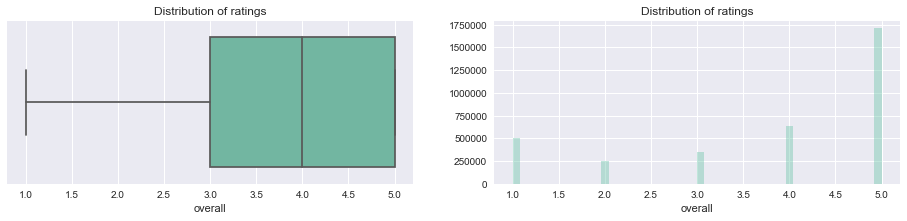

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,3))
ax1 = sns.boxplot(reviews_df.overall, ax=ax[0])
ax2 = sns.distplot(reviews_df.overall, ax=ax[1], kde=False)
ax1.set_title('Distribution of ratings')
ax2.set_title('Distribution of ratings')
plt.show()

### Reviews through time
We plot the distribution of reviews through years, and for 2013.

In [10]:
#Re-compute datetime with unixReviewTime
reviews_df['datetime'] = pd.to_datetime(reviews_df.unixReviewTime, unit='s')

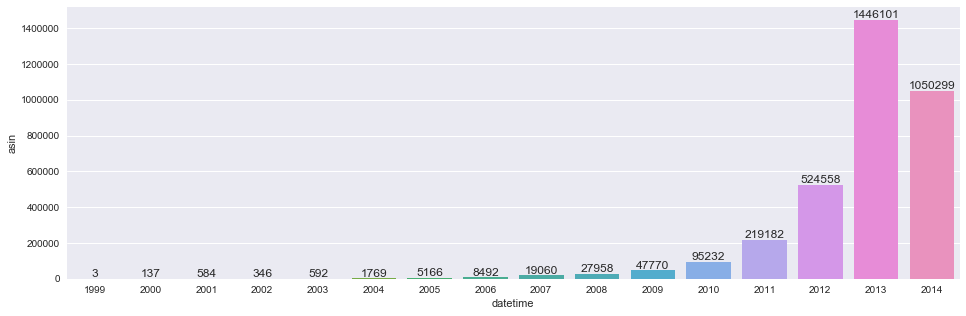

In [11]:
#By year in general
year = reviews_df.groupby([reviews_df.datetime.dt.year])['asin'].count()
fig, ax = plt.subplots(figsize=(16,5))
year_df = pd.DataFrame(year)
ax = sns.barplot(year_df.index, year_df.asin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10000,
            '{:1.0f}'.format(height),
            ha="center") 

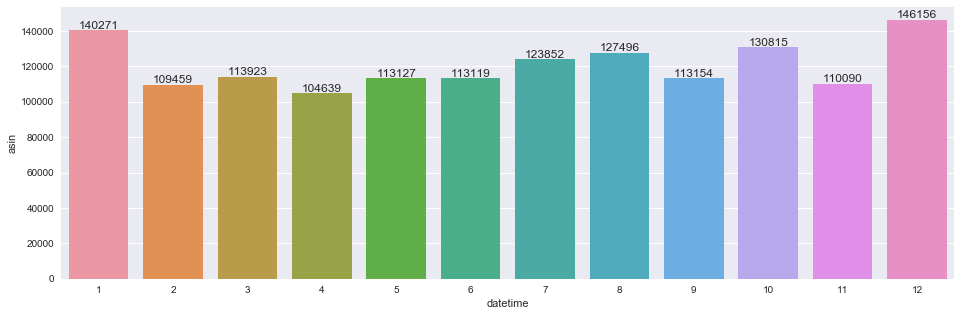

In [12]:
#In 2013 for example
year = reviews_df.groupby([reviews_df.datetime.dt.year, reviews_df.datetime.dt.month])['asin'].count()
year_2013 = year[(2013, )]
fig, ax = plt.subplots(figsize=(16,5))
year_2013_df = pd.DataFrame(year_2013)
ax = sns.barplot(year_2013_df.index, year_2013_df.asin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.0f}'.format(height),
            ha="center") 

## Metadata dataset

We also use the metadata dataset, to get more details on the products.

### Row data analysis
Here, we analyse the dataset that contains phones and accessories.

In [13]:
null_price = metadata_df.price.isnull().sum()
null_price_percent = null_price / metadata_df.shape[0] *100
null_brand = metadata_df.brand.isnull().sum()
null_brand_percent = null_brand / metadata_df.shape[0] *100
print ("Number of products: ", metadata_df.shape[0])
print ("Percentage of null prices: ", null_price_percent)
print ("Percentage of null brands: ", null_brand_percent)

Number of products:  346793
Percentage of null prices:  18.4098294948
Percentage of null brands:  77.3873751777


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED36387E10>]], dtype=object)

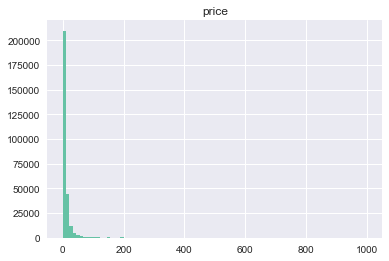

In [14]:
metadata_df.hist(column='price', bins=90)

As we can see, we have missing values concerning the prices.

## Phones analysis

We decide to create a new meta dataframe that only contains information about phones.

In [15]:
phones_df = metadata_df[metadata_df.categories.str.
            startswith("[['Cell Phones & Accessories', 'Cell Phones', 'Unlocked ")]
phones_df = phones_df[(pd.notnull(phones_df['brand'])) & (phones_df['brand'] != '')]
print("Phones count:", len(phones_df))
phones_df.head()

Phones count: 1343


,Unnamed: 0,asin,related,title,price,salesRank,imUrl,brand,categories,description
2861,2861,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The quad-band Motorola V400 cell phone feature...
3702,3702,B0009FCAJA,"{'also_bought': ['B000IN5ZHM', 'B0016JDE34', '...","Motorola RAZR V3 Unlocked Phone with Camera, a...",69.99,{'Cell Phones & Accessories': 10173},http://ecx.images-amazon.com/images/I/41294T68...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",When the Motorola RAZR V3 was launched last ye...
5456,5456,B000GGO5KO,"{'also_viewed': ['B000PEOLAG', 'B00A6D9WLY', '...",Sony Ericsson M600i Unlocked Cell Phone with 3...,120.00,{'Cell Phones & Accessories': 1178113},http://ecx.images-amazon.com/images/I/21I6mmuz...,Sony Ericsson,"[['Cell Phones & Accessories', 'Cell Phones', ...",Put your office in your pocket with the incred...
6575,6575,B000J0YH9Q,"{'also_viewed': ['B0014TAFPG'], 'buy_after_vie...",Motorola RIZR Z3 Unlocked GSM Quadband Cell Ph...,99.99,{'Cell Phones & Accessories': 697207},http://ecx.images-amazon.com/images/I/51opABnP...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The Motorola RIZR Z3 features an ultra smooth ...
6654,6654,B000J6EXTY,"{'also_bought': ['B000IN5ZHM', 'B0009H2M1Y', '...",Motorola RAZR V3i Dolce &amp; Gabbana Unlocked...,69.95,{'Cell Phones & Accessories': 16025},http://ecx.images-amazon.com/images/I/41VTMFSG...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",You've probably seen the wildly popular Motoro...


### Brand names

We decide to use a public dataset from GSMArena, which contains more than 8000 phones specifications scraped GSMArena Website.<br>
This dataset is available here: https://www.kaggle.com/arwinneil/gsmarena-phone-dataset/version/1 <br>
The last update is Jun 2017.

In [16]:
gsmarena_df = pd.read_csv('./data/phone_dataset.csv', error_bad_lines=False)
gsmarena_df.head()

b'Skipping line 821: expected 40 fields, saw 41\nSkipping line 6060: expected 40 fields, saw 41\nSkipping line 6663: expected 40 fields, saw 41\n'


,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,...,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0| A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,...,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,N/A,NaN,NaN,NaN,No,No,2016 April,...,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,...,4.0| A2DP| LE,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity| compass,Removable Li-Po 4020 mAh battery,Black| Gold,230.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...


This dataset enables to filter the phones in our Amazon Phones dataframe using the phone brand.

In [17]:
list_brands_accepted = gsmarena_df.brand.str.lower().unique()

In [18]:
#Keep only phones contained in list of accepted brands
print(phones_df['brand'].str.lower().unique())
brands_number_before = len(phones_df['brand'].str.lower().unique())
phones_df_filtered = phones_df[phones_df['brand'].str.lower().isin(list_brands_accepted)]
brands_number_after = len(phones_df_filtered['brand'].str.lower().unique())
print('')
print('Before processing (# of brands, # of phones):', brands_number_before, len(phones_df))
print('After processing (# of brands, # of phones):', brands_number_after, len(phones_df_filtered))


['motorola' 'sony ericsson' 'nokia' 'global star' 'sony' 'blackberry' 'lg'
 'htc' 'apple' 'pharos' 'panasonic' 't mobile' 'palm' 'cricket' 'telular'
 't-mobile' 'curve 8350i' 'samsung' 'inmarsat' 'vip-top sales watch phone'
 'dell' 'droid' 'bolo brands' 'unlocked-cell-phones' 'huawei' 'pantech'
 'hp' 'at&amp;t' 'verizon' 'victor' 'cellularfactory' 'sharp' 'unknown'
 'casio' 'generic' 's lll' 'ulefone' 'phone merchant' 'greatcall'
 'novatel wireless' 'star' 'unnecto' 'alcatel' 'jeg &amp; sons, inc.' 'svp'
 'android' 'gray' 'fujimoto dengyo' 'newcay' 'flylink' 'ebest' 'px phone'
 'digital family' 'huawei honor' 'albanese' 'jiayu g3t' 'kyocera' 'weikin'
 'lenovo' 'zte' 'blu' 'fusion 2' 'etree' 'caterpillar' 'indigi'
 'huhushop(tm)' 'zopo' 'toto' 'tomtop' 'samsung galaxy s4 - google edition'
 'samsung galaxy mega' 'jiayu' 'ct-miami llc' 'terrapin' 'lumia'
 'moneysaving4you' 'nec' 'tab 3 8&quot;' 'ocean cross' 'unassigned' 'thl'
 'dracotek' 'yezz wireless' 'u watch' 'eson' 'lxl' 'migo' 'gif

### Phone prices

In [19]:
print('Number of phones with NaN price:', phones_df_filtered.price.isnull().sum())

Number of phones with NaN price: 2


We can see that the prices for almost all phones are known, and most of them are in range 50-300 euros. 

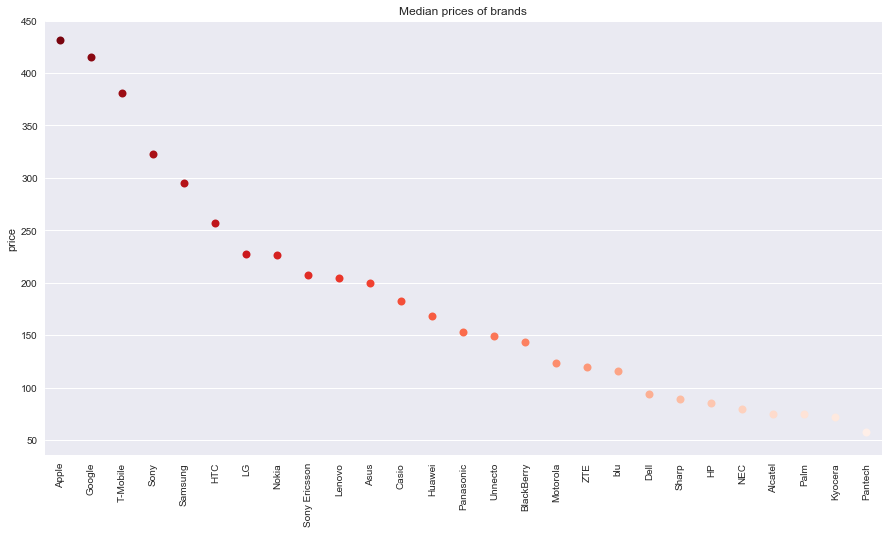

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
avg_prices = phones_df_filtered.groupby('brand')['price'].mean().sort_values(ascending=False)
d = [i for i in range(0, len(avg_prices))]
ax = sns.stripplot(d, avg_prices,size=8, palette="Reds_r")
ax.set_xticklabels(avg_prices.index, rotation='vertical')
ax.set_title('Median prices of brands')
plt.show()

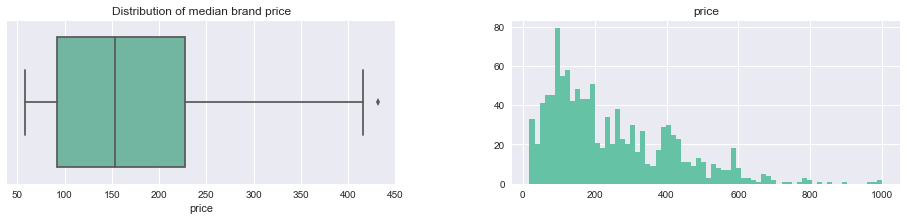

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16,3))
ax1 = sns.boxplot(avg_prices, ax=ax[0])
ax2 = phones_df_filtered.hist(column='price', bins=70, ax=ax[1])
ax1.set_title('Distribution of median brand price')
ax1.set_title('Distribution of median brand price')
plt.show()

### Number of phones per brand

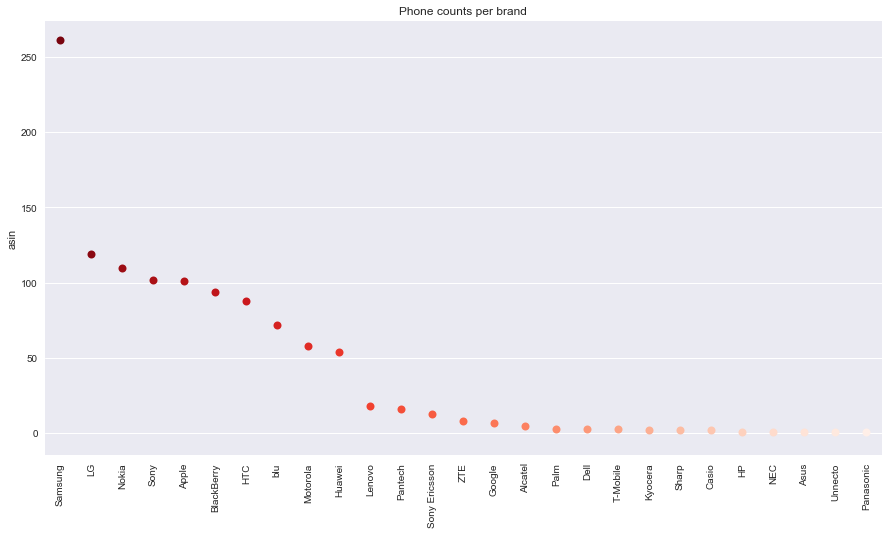

In [22]:
phone_counts = phones_df_filtered.groupby('brand')['asin'].count().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
d = [i for i in range(0, len(phone_counts))]
ax = sns.stripplot(d, phone_counts, size=8, palette="Reds_r")
ax.set_xticklabels(phone_counts.index, rotation='vertical')
ax.set_title('Phone counts per brand')
plt.show()

More than 200 phones are Samsung phones, Apple is the 5th.

## Merged dataframes for reviews and phones metadata


We will now merge these two dataframes and check statistics for new dataframe. 

In [23]:
final_df = pd.merge(phones_df_filtered, reviews_df, on='asin', how='inner')
print('Number of reviews in total:', len(final_df))

Number of reviews in total: 56222


In [24]:
final_df.head()

,Unnamed: 0_x,asin,related,title,price,salesRank,imUrl,brand,categories,description,Unnamed: 0_y,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,datetime
0,2861,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The quad-band Motorola V400 cell phone feature...,20437,A1LZEEL11U755M,A. Le,"[2, 2]","I didn't buy from this seller, but I owned thi...",5.0,sturdiest phone ever!,1240012800,"04 18, 2009",2009-04-18
1,2861,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The quad-band Motorola V400 cell phone feature...,20438,A21BFCRY0I0RD7,"Jose Carlos P. Reyes ""otomed""","[4, 4]",I've been using a Motorola V190 for well over ...,5.0,Good phone for day to day use,1261958400,"12 28, 2009",2009-12-28
2,2861,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The quad-band Motorola V400 cell phone feature...,20439,A2ND5GHEMRZV0D,Leonila Romualdo,"[1, 5]",order took 2 weeks because the package came ba...,2.0,motorola from freehasslecell.com,1235433600,"02 24, 2009",2009-02-24
3,3702,B0009FCAJA,"{'also_bought': ['B000IN5ZHM', 'B0016JDE34', '...","Motorola RAZR V3 Unlocked Phone with Camera, a...",69.99,{'Cell Phones & Accessories': 10173},http://ecx.images-amazon.com/images/I/41294T68...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",When the Motorola RAZR V3 was launched last ye...,37599,A36EJJUDZ37UHS,NaN,"[4, 4]",I've ordered 3 of these phones from 2 differen...,1.0,phone is nothing but problems - not authentic ...,1200096000,"01 12, 2008",2008-01-12
4,3702,B0009FCAJA,"{'also_bought': ['B000IN5ZHM', 'B0016JDE34', '...","Motorola RAZR V3 Unlocked Phone with Camera, a...",69.99,{'Cell Phones & Accessories': 10173},http://ecx.images-amazon.com/images/I/41294T68...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",When the Motorola RAZR V3 was launched last ye...,37600,A2T8YGL2PJJ93A,4004CII,"[8, 9]","I read the other reviews, heard about the drea...",2.0,What a piece of junk!,1158710400,"09 20, 2006",2006-09-20


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECB6269358>]], dtype=object)

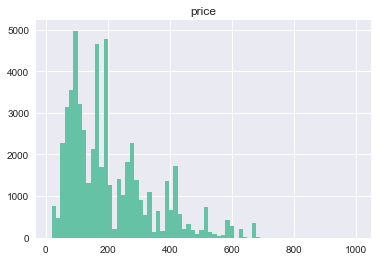

In [25]:
# Distribution of phone prices
final_df.hist(column='price', bins=70)

## Phone reviews through time

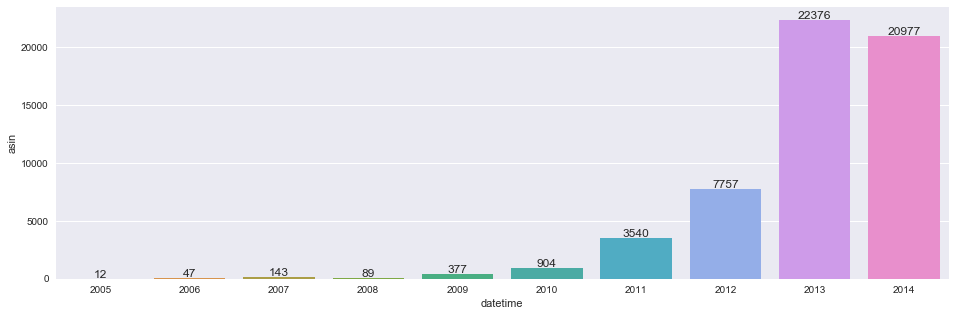

In [26]:
#By year in general
year = final_df.groupby([final_df.datetime.dt.year])['asin'].count()
fig, ax = plt.subplots(figsize=(16,5))
year_df = pd.DataFrame(year)
ax = sns.barplot(year_df.index, year_df.asin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.0f}'.format(height),
            ha="center") 

We observe that the most important part of the reviews are from 2013-2014.

## Mean ratings of brands

In [27]:
### Top10 prominent brands
brand_ratings = final_df.groupby('brand').agg({'overall':['mean','std']})

brand_ratings_df = pd.DataFrame(brand_ratings.overall)
brand_ratings_df.sort_values('mean', ascending=False)

,mean,std
brand,,
Kyocera,4.416667,1.088300
Google,4.347534,1.160330
Panasonic,4.250000,1.035098
Sony,4.109865,1.310141
Asus,4.000000,1.549193
blu,3.949449,1.322714
Lenovo,3.921739,1.312209
Huawei,3.836177,1.458411
Samsung,3.808519,1.536949


In [28]:
# TOP 10 Products by brands
brands = np.array(phone_counts.head(10).index)
brands

array(['Samsung', 'LG', 'Nokia', 'Sony', 'Apple', 'BlackBerry', 'HTC',
       'blu', 'Motorola', 'Huawei'], dtype=object)

In [29]:
top_products = final_df.groupby(['brand','title']).agg({'overall':['mean','std'], 'asin':'count'})
top_products.columns = top_products.columns.droplevel()
top_products_df = pd.DataFrame(top_products)

## TOP 10 reviewed phones by brand

In [30]:
#TOP 10 reviewed phones
top_reviewed_brands_list = []
for brand in brands:
    top10_reviewed = top_products_df.iloc[top_products_df.index.get_level_values('brand') == brand]
    top_reviewed_brands_list.append(top10_reviewed.sort_values(['count'], ascending=False).head(10))
    
top_reviewed_brands = pd.concat(top_reviewed_brands_list)
top_reviewed_brands

mean  \
brand    title                                                          
Samsung  Samsung Galaxy S3 Mini (GT-i8190 / GT-I8200) fa...  3.872753   
         Samsung Galaxy S3 GT-i8190 Mini Blue 8GB factor...  4.046053   
         Samsung Galaxy S3 i9300 16GB - Factory Unlocked...  3.731109   
         Samsung Galaxy S3 i9300 16GB - Factory Unlocked...  3.679406   
         Samsung Galaxy Note II N7100 16GB Gray-Unlocked...  4.042424   
         SAMSUNG GALAXY S4 MINI GT-i9195 8GB-UNLOCKED In...  3.711864   
         Samsung Galaxy S4 GT-i9500 16GB Factory Unlocke...  3.613692   
         Samsung Galaxy S DUOS S7562 Unlocked GSM Phone ...  3.086514   
         Samsung Galaxy S4 White i9500 16GB Factory Unlo...  3.730667   
         Samsung Focus I917 Unlocked Phone with Windows ...  3.710884   
LG       LG Env Touch VX11000 Touch Screen Cell Phone (V...  3.297921   
         LG Optimus L9 P769 4GB Android Smartphone - T-M...  4.000000   
         LG KP500 Cookie Unlocked Phone with 3.2 MP Came...  3.524345   
         LG Cosmos VN250 Verizon Phone (POST PAID)           3.391705   
         LG GT550 Encore Unlocked Phone with 3MP Camera,...  2.725118   
         LG GT365 Neon GSM Unlocked Phone with 2 MP Came...  2.887701   
         LG Dare VX-9700 Cell Phone - Verizon or Page Plus   3.069182   
         LG A275 Black Unlocked GSM Dual SIM QuadBand Ce...  3.841772   
         LG Prime GS390 Unlocked Phone with Touchscreen ...  2.938462   
         LG Optimus L7 P705 (white) New Internatioanl Un...  3.698413   
Nokia    Nokia N8 Unlocked GSM Touchscreen Phone Featuri...  3.638150   
         Nokia C3-00 Unlocked Cell Phone (Slate) with QW...  3.980315   
         Nokia Lumia 900 Blue (Cyan) Factory Unlocked        3.600840   
         Nokia Lumia 520 8GB Unlocked GSM Windows 8 OS C...  3.858369   
         Nokia Lumia 900 Black Factory Unlocked              3.042254   
         Nokia Lumia 920 Black Factory Unlocked 32GB pho...  3.422222   
         Nokia C2-01.5 Unlocked GSM Phone with 3.2 MP Ca...  4.106509   
         Nokia Lumia 800 Unlocked GSM Phone with Windows...  3.911950   
         Nokia E7-00 Unlocked GSM Phone with Touchscreen...  3.552239   
         Nokia 6350 Unlocked GSM Flip Phone with Second ...  3.406780   
...                                                               ...   
blu      BLU Studio 5.5 D610a Unlocked Dual SIM GSM Phon...  4.124031   
         BLU Advance 4.0 Unlocked Dual SIM Phone (Black)     4.104603   
         BLU Life One L120 Unlocked Dual Sim Phone with ...  4.340541   
         BLU Studio 5.0 II Unlocked Dual SIM Phone with ...  3.754286   
         BLU Dash 5.0 D410a Unlocked Dual SIM  GSM Phone...  4.112069   
         Studio 5.5S Quad Band Unlocked (White)              4.077778   
         Studio 5.0S II Quad Band Unlocked (White)           4.132530   
         BLU Zoey Quadband Unlocked Dual SIM Phone with ...  3.697368   
         BLU Q170T Samba TV Unlocked Dual SIM Quad-Band ...  3.226667   
         BLU Life Pure Unlocked Phone (Black)                3.986486   
Motorola Motorola Moto G - Global GSM - Unlocked - 8GB (...  4.519750   
         Motorola RAZR V3 Unlocked Phone with Camera, an...  2.791667   
         Motorola Atrix 4G MB860 Unlocked GSM Phone with...  3.570667   
         Motorola RAZR V3 Unlocked Phone with Camera, an...  2.504274   
         Motorola Droid Bionic 4G LTE WiFi Android Smart...  3.286920   
         Motorola Droid 2 A955 Verizon Phone 5MP Cam, Wi...  2.921053   
         Motorola RAZR XT912 Black Verizon Wireless          3.395973   
         BlackBerry Pearl 8100 Unlocked Phone with Quad-...  2.640845   
         Motorola Defy MB525 Unlocked Cellphone with And...  3.369748   
         Motorola Droid 3 Verizon Xt862 Verizon Cell Phone   3.238095   
Huawei   Huawei Ascend Y300-0151 4GB WiFi Android Touchs...  4.141593   
         Huawei Y300 Android 4.1 Dual Core 1.0GHz, 4.0 i...  3.719101   
         Huawei U9200 Ascend P1 Unlocked Phone - B

## TOP 10 best rated phones by brand
Be careful, some phones are high-rated, but they have only one review.

In [31]:
#TOP 10 best phones
top_best_brands_list = []
for brand in brands:
    top10_best = top_products_df.iloc[top_products_df.index.get_level_values('brand') == brand]
    top_best_brands_list.append(top10_best.sort_values(['mean'], ascending=False).head(10))
    
top_best_brands = pd.concat(top_best_brands_list)
top_best_brands

mean  \
brand    title                                                          
Samsung  Samsung Galaxy Ace 3 S7275 Factory Unlocked GSM...  5.000000   
         Samsung Galaxy S3 S III Gt-i9300 16gb Titanium ...  5.000000   
         SAMSUNG GT-I9300 Galaxy S III 16 GB Unlocked Ph...  5.000000   
         Samsung Galaxy Win GT-i8552L Ceramic White Unlo...  5.000000   
         Samsung Galaxy Grand 2 Dual Sim, 8MP, 8GB, Quad...  5.000000   
         Samsung Galaxy GT-I8552 Win Dual Sim Unlocked S...  5.000000   
         Samsung Flight II SGH-A927 AT&amp;T Cell Phone      5.000000   
         Samsung Galaxy S3 Neo DUOS I9300i 16GB Unlocked...  5.000000   
         Samsung Galaxy S4 GT i9505 16GB - Purple - Fact...  5.000000   
         Samsung Galaxy S Ii Plus I9105 S2 Blue (Factory...  5.000000   
LG       LG OPTIMUS G E975 32GB BLACK ANDROID FACTORY UN...  5.000000   
         NEW Lg Optimus G Pro Black 16gb E988 5.5&quot; ...  5.000000   
         Lg G2 D802 4g 32GB Factory Unlocked Internation...  5.000000   
         Lg G2 D802 White 32gb (Factory Unlocked) 5.2&qu...  5.000000   
         Lg G2 Mini D620 White                               5.000000   
         BNIB LG G3 D855 16GB Gold Factory Unlocked 4G 3...  5.000000   
         LG Optimus L3 II E435 White Dual Sim Factory Un...  5.000000   
         NEW LG G2 D802 16GB WHITE FACTORY UNLOCKED LTE ...  5.000000   
         Lg G2 D802 32gb GOLD Unlocked                       5.000000   
         BNIB LG G3 D855 16GB Silk White Factory Unlocke...  5.000000   
Nokia    Nokia Lumia 520 Quad-Band GSM Smartphone Blue -...  5.000000   
         NOKIA 208 BLACK CELL.QB. 2.4&quot;TYPE BT 1.3MP...  5.000000   
         Nokia 106.3 Negro/black Unlocked Dualband GSM 8...  5.000000   
         Nokia Lumia 1520 White Rm-937 (Factory Unlocked...  5.000000   
         Brand New Nokia Lumia 620 Yellow Factory Unlock...  5.000000   
         Nokia 6700 SLIDE PINK Unlocked Phone                5.000000   
         Nokia 925 Lumia Black and White (White)             5.000000   
         Nokia Lumia 800 Unlocked Phone With - Purity HD...  5.000000   
         Nokia Lumia 1520 Yellow Factory Unlocked RM-937...  4.857143   
         Nokia Lumia 925 - Black                             4.800000   
...                                                               ...   
blu      BLU Diva T272T Unlocked GSM Phone with Dual SIM...  5.000000   
         BLU Dash 5.0 D410a Unlocked Dual SIM  GSM Phone...  5.000000   
         Blu LIFE 8 Unlocked (Yellow)                        4.750000   
         BLU Life One L120 Unlocked Dual Sim Phone with ...  4.340541   
         Vivo 4.8 HD Quad Band Unlocked (White)              4.333333   
         Life Pure XL Full HD, 16MP, (32 GB+3GB RAM) - F...  4.333333   
         BLU Life Play X L102A Black Unlocked GSM Dual-S...  4.285714   
         BLU Dash 5.0 D410a Unlocked Dual SIM  GSM Phone...  4.200000   
         BLU Dash D171a -Unlocked- Black                     4.200000   
         BLU Samba W Q170W Unlocked Dual SIM Quad-Band I...  4.142857   
Motorola MOTOROLA A1200 WHITE GSM MP3 PDA CAMERA CELLPHONE   5.000000   
         Motorola MOTORIZR Z8 Black Unlocked Triband GSM...  5.000000   
         Motorola Moto G - Global GSM - Unlocked - 8GB (...  4.519750   
         Motorola Tundra VA76r Rugged GSM Cell Phone AT&...  4.266667   
         Motorola Droid RAZR MAXX Limited Edition XT912 ...  4.250000   
         Motorola Atrix HD MB886 Unlocked GSM 4G LTE And...  4.181818   
         Motorola Droid RAZR M XT907 8GB LTE 4G White - ...  4.083333   
         Motorola Tundra Va76r (Locked to At&amp;t) Mp3 ...  4.083333   
         Motorola EX223 Unlocked GSM Phone with Dual SIM...  4.076923   
         Motorola MOTO G XT1033 8GB Unlocked GSM Dual-SI...  4.000000   
Huawei   UNLOCKED Huawei Ascend Y530 Google Android Phon...  5.000000   
         Huawei MediaPad X1 Smart Cell Phone Hisilicon K...  5.000000   
         Huawei G610 Unlocked Android Smartphone (

## Correlations
A high price does not mean necessarily a good grade.

In [32]:
#Correlation between price and overall
final_df['price'].corr(final_df['overall'])

0.13570524839163958

## Important words in general in reviews

Here, we want to show the feature importance of words, correlated with the total overall for each brands.<br>
We use CountVectorizer in order to convert the collection of reviews to a matrix of token counts.<br>
Then, this matrix containing all the features is pushed in SelectKBest() function which reduce the dimension (we choose 10) according to the k highest scores.<br>

Then, we plot the correlation between words. A high correlation means that the two words are highly correlated with the rate of the products (good or bad).

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest

C:\Users\rassinoux\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


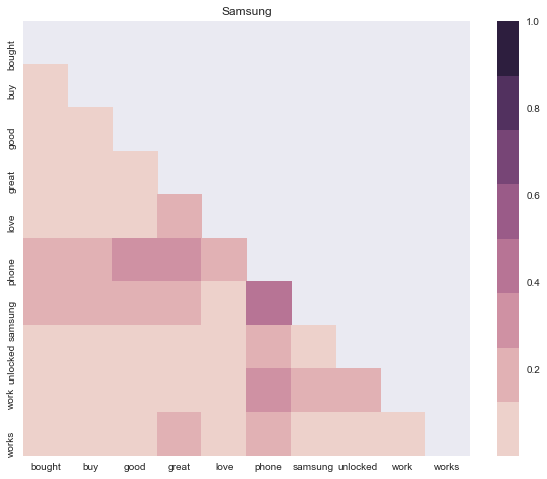

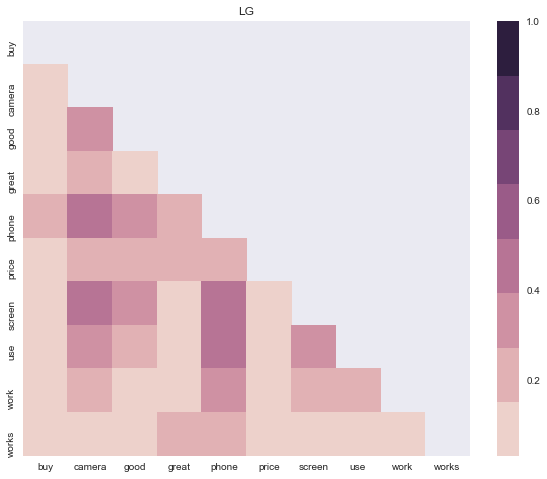

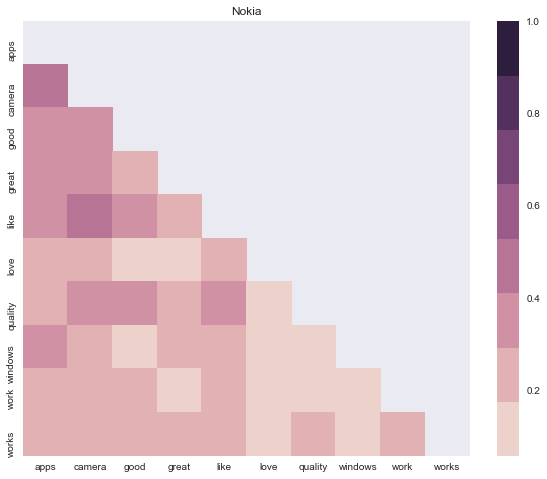

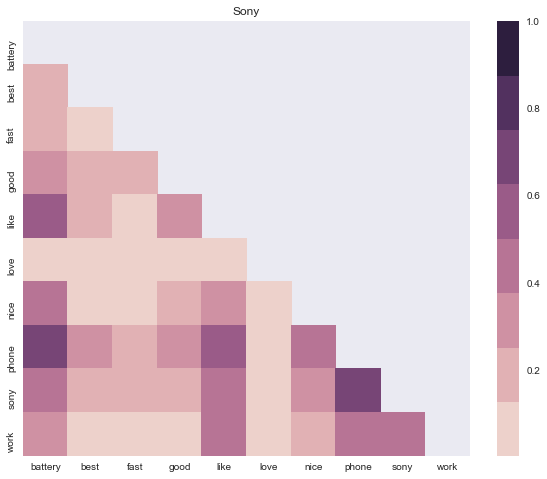

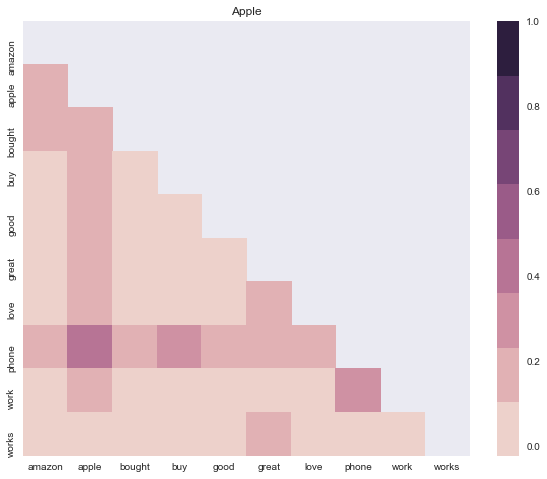

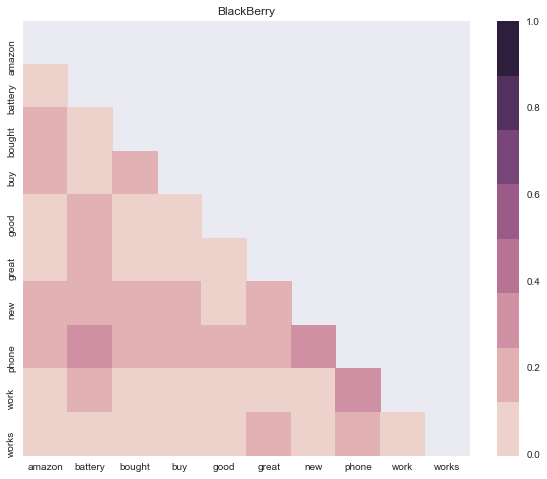

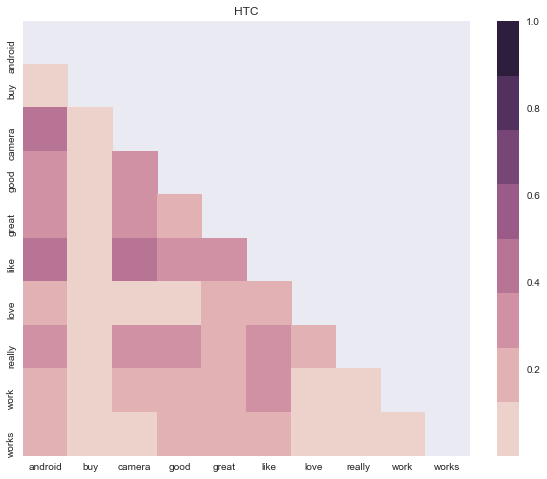

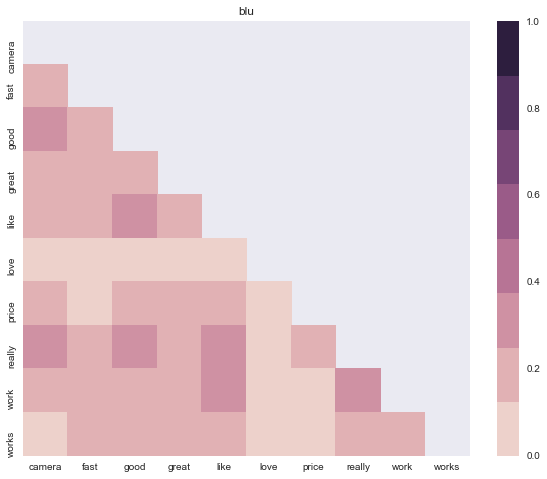

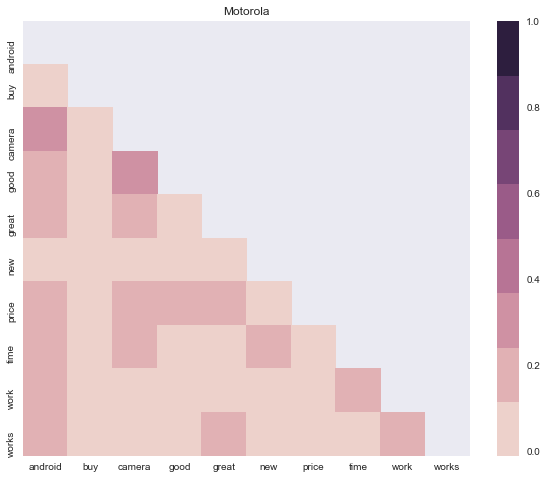

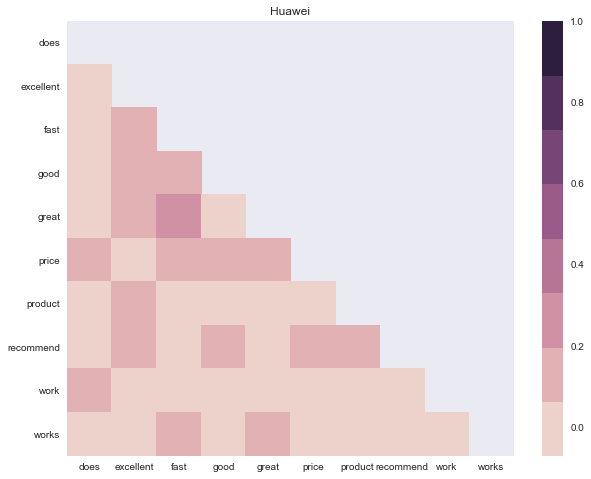

In [34]:
for brand in brands:
    top10 = final_df[final_df.brand == brand]
    # Use CountVectorizer to get most important words in reviews for each brands
    vectorizer = CountVectorizer(max_features=25, stop_words='english')
    X = vectorizer.fit_transform(top10.reviewText.values.astype('U'))
    word_list = vectorizer.get_feature_names()
    
    model = SelectKBest(k=10).fit(X, top10.overall) # X:model and Y:score
    informative_words_index = model.get_support(indices=True)
    labels = [word_list[i] for i in informative_words_index]
    data = pd.DataFrame(X[:, informative_words_index].todense(), columns=labels)
    
    correlation_matrix = data.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    mask = np.zeros_like(correlation_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(correlation_matrix, mask=mask, cmap=sns.cubehelix_palette(8), ax=ax)
    ax.set_title(brand)
    fig.show()

# Additional analysis

In [56]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rassinoux\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rassinoux\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\rassinoux\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rassinoux\AppData\Roaming\nltk_data...


True

Here, we distinguish positive and negative reviews:
- if rate <= 2 : it is a negative review
- if rate == 3: it is a neutral review
- if rate >= 4 : it is a positive review

In [46]:
print('Number of reviews:', final_df.reviewText.count())

review_number = final_df.groupby('brand')['reviewText'].count().sort_values(ascending=False)
negative_ratings = final_df.query('overall <= 2')
positive_ratings = final_df.query('overall >= 4')

negative = negative_ratings.groupby('brand')['reviewText'].count().sort_values(ascending=False)
positive = positive_ratings.groupby('brand')['reviewText'].count().sort_values(ascending=False)

Number of reviews: 56205


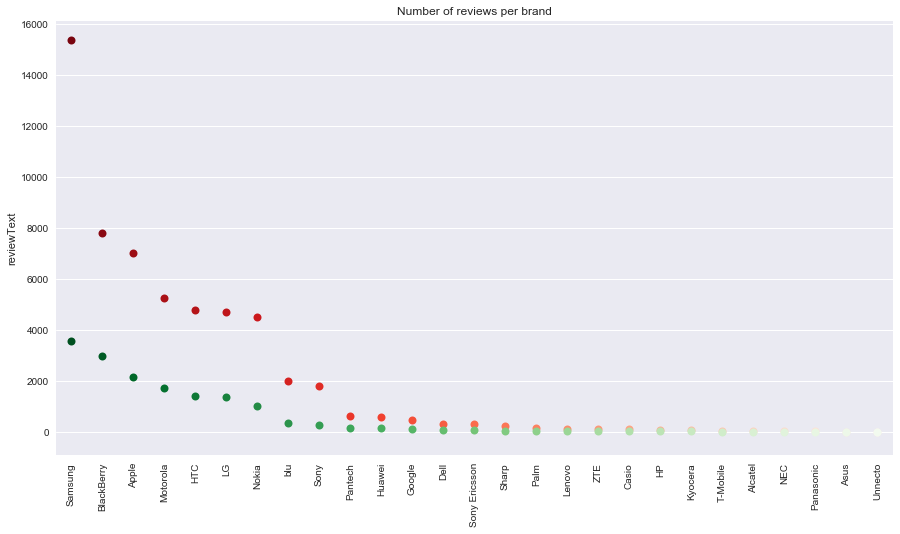

In [47]:
fig, ax = plt.subplots(figsize=(15,8))

d = [i for i in range(0, len(review_number))]
ax = sns.stripplot(d, review_number, size=8, palette="Reds_r")
ax = sns.stripplot(d, negative, size=8, palette="Greens_r")
#ax = sns.stripplot(d, positive, size=8, palette="Blues_r")

ax.set_xticklabels(review_number.index, rotation='vertical')
ax.set_title('Number of reviews per brand')
plt.show()

We use the previous pipeline to get most important words in **negative** reviews for one example of phone.

size:  (216, 20)


C:\Users\rassinoux\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


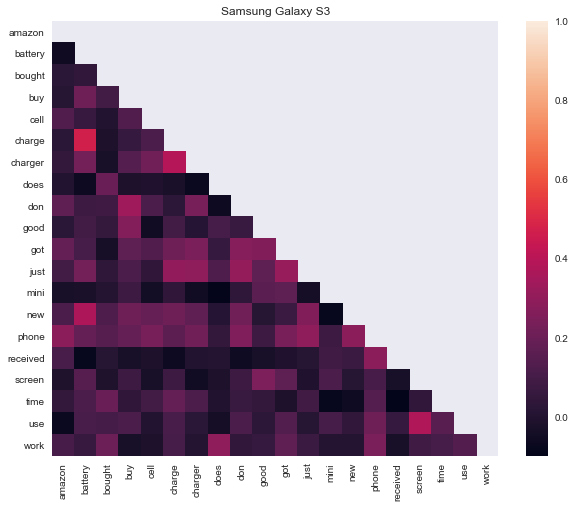

In [48]:
#print ("Brand: ", brand)
#top10 = positive_ratings[positive_ratings.brand == 'Samsung']
top10 = negative_ratings.query('title == \'Samsung Galaxy S3 GT-i8190 Mini Blue 8GB factory Unlocked 3G 900/1900/2100\'')
print ("size: ", top10.shape)
    
vectorizer = CountVectorizer(max_features=25, stop_words='english')
X = vectorizer.fit_transform(top10.reviewText.values.astype('U'))
word_list = vectorizer.get_feature_names()
model = SelectKBest(k=20).fit(X, top10.overall) # X:model and Y:score
informative_words_index = model.get_support(indices=True)
labels = [word_list[i] for i in informative_words_index]
data = pd.DataFrame(X[:, informative_words_index].todense(), columns=labels)
    
correlation_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(correlation_matrix, mask=mask,  ax=ax)
ax.set_title("Samsung Galaxy S3")
fig.show()

# First approach

Description of work

In [51]:
lemmatizer = WordNetLemmatizer()

def get_words(review):
    stop = stopwords.words('english') + list(string.punctuation) + ["..."] + ["'s"]
    tokens = nltk.tokenize.word_tokenize(str(review))
    tokens_filtered = [token.lower() for token in tokens]
    tokens_filtered = [token for token in tokens_filtered if token not in stop]
    tokens_filtered = [lemmatizer.lemmatize(token) for token in tokens_filtered]
    return tokens_filtered

def form_review(review):
    p = get_words(review)
    s = {word: True for word in get_words(review)}
    return s

positive_model_reviews = positive_ratings
negative_model_reviews  = negative_ratings

print (positive_model_reviews.shape)
print (negative_model_reviews.shape)

positive_reviews_list = list(positive_model_reviews.reviewText)
negative_reviews_list = list(negative_model_reviews.reviewText)

positive_data = []
negative_data = []


for review in positive_reviews_list[0:10000]:
    positive_data.append([form_review(review), 'pos'])
    
for review in negative_reviews_list[0:10000]:
    negative_data.append([form_review(review), 'neg'])

train_data = positive_data[0:9000] + negative_data[0:9000]
test_data = positive_data[9000:] + negative_data[9000:]

print('Size train data:', len(train_data))
print('Size test data:', len(test_data))

(35684, 20)
(15524, 20)
Size train data: 18000
Size test data: 2000


In [52]:
from nltk import NaiveBayesClassifier

model = NaiveBayesClassifier.train(train_data)

In [53]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(model, test_data))*100)

Classifier accuracy percent: 83.89999999999999


In [54]:
model.show_most_informative_features(5)

Most Informative Features
               excelente = True              pos : neg    =     65.0 : 1.0
                perfecto = True              pos : neg    =     41.8 : 1.0
                    scam = True              neg : pos    =     37.7 : 1.0
                perfecta = True              pos : neg    =     32.3 : 1.0
                   false = True              neg : pos    =     26.2 : 1.0


## Sentiment analysis on all review

In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

for sentence in positive_reviews_list:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in ss:
        print(k," : ", ss[k])
    print()

I didn't buy from this seller, but I owned this phone when it first came out.  It is by far one of the best cell phones I've ever owned.  It has great reception, the sound quality is superb, and is very very sturdy.  My phone was dropped down the stairs, dropped in a puddle, left out in the sun at the beach where little grains of sand got everywhere and it functioned just fine.  The material it's made of is really tough and doesn't scratch easily if you take care not to drop it often.  The only problem I found with this phone is that it has a really poor camera and tiny screen.  Everything else was above par.  Hope this helps!  :)
neg  :  0.083
neu  :  0.674
pos  :  0.244
compound  :  0.9819

I've been using a Motorola V190 for well over 2 years and figured I need a similar phone as replacement. I wasn't disappointed - keypad and controls were similar, audio was great in a thinner package. While battery capacity was limited it made for a slimmer phone I could tuck in a belt holster wit

compound  :  0.7264

Since these are being sold, I thought I'd offer some comments.  First, I love this phone.  We bought three of them in 2007. Phone 1 is still going strong.  Phone 2 was dropped or got in water (teen son) and died.  Phone 3 was virtually never used...it was a secondary phone I kept in my purse and occasionally turned it on, but in 7 years I bet it had no more than 10 hours of talk time on it.  Seriously!  It was never dropped, it had a protective case, it still looks brand new.  Out of nowhere, when I turned it on all I got was a black screen that was a Bootloader screen that gave software versions, and said I needed to program it and connect a USB data cable.  Sounds  do-able, but no go.  I've searched everywhere, I've taken the phone to various phone guru repair people, and no one can do anything with it.  They are guessing that the internals (ROM perhaps) is corrupted, or some such, but the bottom line is that nothing can apparently get it going agian.  I've email

neg  :  0.039
neu  :  0.755
pos  :  0.207
compound  :  0.9652

There are plenty of reviews of the RAZR V3 on its product pages as well as this one so I'll just review this specific product- the International Version that doesn't have a warranty.I was a little apprehensive about buying one of these without a warranty- and still am- except I did have the Amazon protection for a month.So far (45 days), this RAZR works as well as those I've owned in the past.I've only found two issues so far:1. I can't hear very well on it. It's OK, but just OK. Nowhere near as good as my SLVR or Walkman.2. There are more dropout areas and some areas where reception is weaker than my other phones.But then, it seems like this was typical of my previous RAZRs.All-in-all, especially considering the price, and the fact that it is unlocked makes this a pretty good deal as long as nothing goes wrong with it.Of course, I paid less than the present price and there were no other options like there are now. For inst

pos  :  0.061
compound  :  0.2085

Received it quickly and it works great.  I am using it daily in Belize and have had no hangups with the digicel service here.
neg  :  0.081
neu  :  0.769
pos  :  0.15
compound  :  0.4404

The phone arrived in very good condition noscratches or damage,I personally do not like the international version.I expected it would be programmed like my old razor so was suprised by the more akward programming.Haven't figured out how to program the voice dial but I'm still trying. It arrived faster than I expected would recommend ordering from this supplier.
neg  :  0.051
neu  :  0.862
pos  :  0.087
compound  :  0.5001

This is a great product. The device is very slim and has a clear and modern style that I love. It works very well without any bugs. I highly recommend.
neg  :  0.0
neu  :  0.566
pos  :  0.434
compound  :  0.944

The item was just like the description said. We have had no problems with the phone! Thank you so much!
neg  :  0.185
neu  :  0.604
pos  :


To start the phone was very easy to set up. I'm rocking on some tunes right now as I'm writing this review. I dropped a 4gig card in it and began downloading albums, no problem very simple if you follow the included instructions. The phone does lag at times but this has not been a major issue. Texting, mms, and phone calls all work like any other phone. I read cnn news daily on the phone which works great for me. Overall for me this was a great buy.
neg  :  0.052
neu  :  0.779
pos  :  0.168
compound  :  0.9382

love this phone from since it came out and this is my second one...love this phone to any music loverz like me get one and get a S9...
neg  :  0.0
neu  :  0.789
pos  :  0.211
compound  :  0.7717

The cellphone works great, its slick and music sounds awesome and with built in 2 Gb what more could you ask for?Oh i know! service, they communicate with you and keep in touch so that you don't feel lost.I definitely recommend this product.
neg  :  0.045
neu  :  0.736
pos  :  0.219
co

compound  :  0.6943

I will start off by saying that I have read the reviews of this phone and regarding the seller BSR. I must say that I am shocked at some of the reviews that I have read.Here is my experience with this phone and seller BSR.First off, the Razr V3 is the best flip phone that I have owned till date. The phone that I received worked as the seller has described and looked great considering that it was used. There were next to no scratches or cosmetic issues. The phone came with everything that was needed to use the phone. The phone held a charge and appeared to be fully functional.Here is my experience with BSR Cellular.If you are given the option to buy this phone from BSR, BUY IT FROM THEM. I must also say that I believe that they are the best sellers that I have had the pleasure of doing business with. Due to my ignorance, I purchased this phone without reading the entire ad and to my dismay, it was not for my service provider. I contacted the seller and explained to 

neu  :  1.0
pos  :  0.0
compound  :  0.0

I am not quite sure it is a completely new phone,but it is really nice , if you like bb with querty and roller , I recommand.
neg  :  0.081
neu  :  0.71
pos  :  0.209
compound  :  0.529

When my wife received the UPS package which i sent her as a gift,she told me that the black berry was not found in the package and only accessory was found! it's nearly drive me mad!i try to contact with Amazon to see if there is any chance to return the cargo via email. Amazon reply to me without any doubt that i can directly send them back by UPS and they would refund me!That would be out of mind in china!But it does work in US especially on Amazon.Thanks for the help from Amzon and i really trust the service of Amazon which is 100% worry free!
neg  :  0.025
neu  :  0.806
pos  :  0.169
compound  :  0.9334

nice phone it`s early to speak about quality of phone yet but first opinion  is good. I`ll write review in one year and tell u about it
neg  :  0.0
neu  : 

neg  :  0.062
neu  :  0.715
pos  :  0.223
compound  :  0.9844

I broke my phone before the update time. I ordered this phone and I am pleased with it. I am not use to using the touch features but I am finallay catching on.
neg  :  0.064
neu  :  0.871
pos  :  0.065
compound  :  0.0129

The LG Dare was my first smartphone and I loved it until I "graduated" to an even smarter phone, and gave the Dare to my husband, who had tired of his old phone. Recently, his Verizon contract came up for renewal, whereby he was eligible for a new phone at a discounted price (with a 2-year contract of course), but he refused to give up his Dare, in spite of its being all beat up (he had chosen to not use screen or phone covers while he had it). He was adamant about keeping his Dare, saying it did all he wanted it to do, it was the right size and feel, etc., etc. He also did not want to spend the extra money on a data plan he wasn't going to use (we both have plenty of computer access otherwise) so a smart


I bought this phone through Amazon to use specifically overseas (outside the U.S.). It came with the latest Firmware already installed! Also the instruction manual is an English/German Edition, thats another plus! The phone was already set to english langauge too! I was hoping to get the european adapter, but did not, oh well they are cheap to pick up anyway.I have a Motorola Droid; the size and weight of the cookie is great, its smaller and lighter than the droid. I tested my 16GB micro sd card from my droid in the cookie and it recognized the size even though other reviews here and specs say it only takes a 8GB card. That may have something to do with the firmware version update. One thing to note that i didnt see in any reviews here is to make sure you turn on the phone when its plugged in via USB to your PC or it will not recognize the phone...lolI put in a 3 year old Wataniya sim card and it recognized it right away. Altough I havent used this phone yet, I am more than confident 

AttributeError: 'float' object has no attribute 'encode'

# Second approach

On the second approch, we focus only on reviews according to a brand.
Here is the plan:
1. First, we split the reviews according to the grade (5 groups from 1 to 5).
2. **Topic modelling**: with words vectors and LDA (Latent Dirichlet Allocation) approach: reviews are seen as a bag of words, and topics as a distribution over a fixed vocabulary. Words are generated from document specific topic distributions. As the output of this step we have 10 topics with 10 most import words for each topic (for each brand).
3. **Tag a sentiment on topic words** : We use the previous Sentiment Analyzer to get a weighted sentiment for the topic.<BR>
We consider two kind of words:
    - Feature words (which is one phone feature like battery, price, etc.)
    - Non-feature words (all the others, including 'great', 'bad', 'awesome', 'problem', etc.)
All the non-feature words which are on the topic will be sentiment analyzed. 

4. The weighted scores of all the non-feature words will be given to all the feature words in the following topic. If a topic not contains feature words, we simply skip it.
5. At the end, we group the results to get an overview for all the reviews (all grades) : we count the density of appearence for each feature words in topics, and we also show the sum of polarity scores for each feautre word.

In [84]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

ratings = np.arange(1, 6, 1)
stop_words = text.ENGLISH_STOP_WORDS.union(['phone', 'phones', 'iphone', 'apple', 'samsung', 'amazon']) # Common words

NUMBER_TOPICS = 10
MAX_ITER = 100
MAX_FEATURES = 250
TOP_WORDS = 10

topics = pd.unique(df['topic_id'])
brands = pd.unique(df['brand'])
overall = pd.unique(df['overall'])

df = pd.DataFrame()

for brand in brands:
    for rate in ratings:
        reviews = final_df.query('brand==@brand & overall==@rate')['reviewText'].dropna()
        tf_vectorizer = CountVectorizer(max_features=MAX_FEATURES, stop_words=stop_words)
        tf = tf_vectorizer.fit_transform(reviews)
        tf_feature_names = tf_vectorizer.get_feature_names()

        lda = LatentDirichletAllocation(n_components=NUMBER_TOPICS, max_iter=1, random_state=0, learning_method='batch').fit(tf)

        #Normalize
        lda.components_ /= lda.components_.sum(axis=1)[:, np.newaxis]

        for topic_idx, topic in enumerate(lda.components_):
            temp_df = pd.DataFrame()
            for i in topic.argsort()[:-TOP_WORDS - 1:-1]:
                df = df.append({'brand': brand, 'overall':rate, 'topic_id':topic_idx + 1, 'score': topic[i], 'word':tf_feature_names[i]}, ignore_index=True)


In [85]:
# init sentiment 'analysis'
df["pos_score"] = 0.0
df["neg_score"] = 0.0
df["neu_score"] = 0.0
df["comp_score"] = 0.0

In [86]:
df.head()

,brand,overall,score,topic_id,word,pos_score,neg_score,neu_score,comp_score
0,Apple,1.0,0.037741,1.0,new,0.0,0.0,0.0,0.0
1,Apple,1.0,0.020063,1.0,received,0.0,0.0,0.0,0.0
2,Apple,1.0,0.018439,1.0,stolen,0.0,0.0,0.0,0.0
3,Apple,1.0,0.018343,1.0,item,0.0,0.0,0.0,0.0
4,Apple,1.0,0.016087,1.0,work,0.0,0.0,0.0,0.0


In [87]:
feature_words = ["apps", "camera", "price", "battery", "charge", "sound", "memory", "screen", "speaker"]

In [88]:
score = dict()
for row_num in range(0, len(df), 1):
    word = df['word'][row_num]
    
    # Give score only to non feature words
    if not word in feature_words:
        score = sid.polarity_scores(word)
        pos_score = score['pos'] * df['score'][row_num] * 100
        neg_score = score['neg'] * df['score'][row_num] * 100
        neu_score = score['neu'] * df['score'][row_num] * 100
        comp_score = score['compound'] * df['score'][row_num] * 100

        df.set_value(row_num, 'pos_score', pos_score)
        df.set_value(row_num, 'neg_score', neg_score)
        df.set_value(row_num, 'neu_score', neu_score)
        df.set_value(row_num, 'comp_score', comp_score)

In [89]:
after_filtering = pd.DataFrame(data=df)

# SKIP ALL TOPICS THAT NOT HAVE FEATURE WORD
for brand in brands:
    for topic in topics:
        for rate in overall:
            temp_df = pd.DataFrame(df.query('brand == @brand & topic_id == @topic & overall == @rate')).reset_index(drop=True)

            in_feature_word = False
            for row_num in range(0, len(temp_df), 1):

                word = temp_df['word'][row_num]

                if word in feature_words:
                    in_feature_word = True
                    break
                else:
                    in_feature_word = False

            if not in_feature_word:
                useless_topics = df[
                    (df['topic_id'] == topic) & (df['brand'] == brand) & (df['overall'] == rate)].index.tolist()
                after_filtering = after_filtering.drop(useless_topics, axis=0)


In [90]:
after_filtering.head()

,brand,overall,score,topic_id,word,pos_score,neg_score,neu_score,comp_score
10,Apple,1.0,0.043710,2.0,use,0.0,0.0,4.370994,0.0
11,Apple,1.0,0.026066,2.0,got,0.0,0.0,2.606556,0.0
12,Apple,1.0,0.023646,2.0,sim,0.0,0.0,2.364608,0.0
13,Apple,1.0,0.021570,2.0,work,0.0,0.0,2.157008,0.0
14,Apple,1.0,0.020737,2.0,screen,0.0,0.0,0.000000,0.0


In [91]:
result = []

# FOR EACH FEATURE WORD WE SUM THE SCORE OF ALL THE WORDS IN THE TOPIC
for brand in brands:
    for topic in topics:
        for rate in overall:
            temp_df = pd.DataFrame(after_filtering.query('brand == @brand & topic_id == @topic & overall == @rate')).reset_index(drop=True)

            temp_df_wo_ftr = pd.DataFrame(temp_df[~temp_df['word'].isin(feature_words)]).reset_index(drop=True)
            temp_df_w_ftr = pd.DataFrame(temp_df[temp_df['word'].isin(feature_words)]).reset_index(drop=True)

            pos = temp_df_wo_ftr['pos_score'].sum()
            neg = temp_df_wo_ftr['neg_score'].sum()
            neu = temp_df_wo_ftr['neu_score'].sum()
            comp = temp_df_wo_ftr['comp_score'].sum()

            for row_num in range(0, len(temp_df_w_ftr), 1):

                word = temp_df_w_ftr['word'][row_num]
                append_list = [brand, word, 1, pos, neg, neu, comp]
                result.append(append_list)

In [92]:
result = pd.DataFrame(data=result,
                      columns=["Brand", "Feature", "Density", "Positive", "Negative", "Neutral", "Compound"])
results_grouped = pd.DataFrame(data=result.groupby(["Brand", "Feature"]).sum())

In [93]:
results_grouped

Density    Positive  Negative     Neutral   Compound
Brand   Feature                                                      
Apple   apps           5   23.455182  1.637371   58.677850   9.169343
        battery       15   52.932238  3.211864  175.778655  20.979318
        camera         2    3.800905  1.849182   25.592165   0.930732
        price          3   25.375164  0.000000   36.833334  12.235748
        screen        18   76.536679  5.235690  211.742792  31.969068
LG      apps          10   42.370038  1.381107   93.324631  17.907126
        battery       28  119.338823  2.873023  270.039502  54.088027
        camera         9   43.266020  0.000000   76.248635  18.617050
        charge         1    5.670794  0.000000    7.211514   2.288760
        memory         1    3.324137  0.000000    7.621868   1.724090
        price          7   54.962405  0.000000   48.298768  25.757424
        screen        39  182.084332  2.873023  396.696608  83.144734
Samsung apps           6   32.289481  0.000000   59.003080  14.813944
        battery       29  124.785283  5.802105  301.609661  54.673559
        camera         4   24.914050  2.380207   36.832340  11.278040
        charge         1    3.235042  1.525077    9.740062   0.687383
        price          2   15.242763  0.000000   15.699218   6.948476
        screen        28  126.718144  4.431607  291.634219  58.180513